# The most dangerous diseases and season mortality

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar
%matplotlib inline
# default figsize for charts
figsize = (12, 6)

In [2]:
# load disease description for each Icd10Code
dficd = pd.read_csv('../input/Icd10Code.csv')

In [3]:
# load general data
dffull = pd.read_csv('../input/DeathRecords.csv')

In [4]:
# create a order series with o
# compiled a list of diseases in the number of deaths (from highest to lowest)
deseasesDeathsList = dffull.Icd10Code.value_counts()
deseasesDeathsList.head()

I251    161961
C349    154862
F03     122021
I219    114107
J449    107836
Name: Icd10Code, dtype: int64

# Show table of deseasesDeathsList with Icd10Code description 

In [5]:
# calculate total deaths
totalDeaths = float(sum(deseasesDeathsList.values))
totalDeaths

2631171.0

In [6]:
icdcodes = []
for x in deseasesDeathsList.index:
    tmp = dficd[dficd.Code == x]
    if tmp.empty:
        desc = ''
    else:
        desc = tmp.Description.values[0]
    icdcodes.append(desc)
s1 = pd.Series(deseasesDeathsList.values, index=deseasesDeathsList.index, name='Value')
s2 = pd.Series(icdcodes, index=deseasesDeathsList.index, name='Description')
dfRank = pd.concat([s1, s2], axis=1)

xx = [0]
for x in dfRank.Value / totalDeaths:
    xx.append(xx[-1] + x)
dfRank['AccumRelValue'] = xx[1:]
dfRank['Number'] = range(1,len(xx[1:])+1)
dfRank['Icd10Code'] = dfRank.index

dfRank.head(10)

,Value,Description,AccumRelValue,Number,Icd10Code
I251,161961,Atherosclerotic heart disease,0.061555,1,I251
C349,154862,"Malignant neoplasm: Bronchus or lung, unspecified",0.120411,2,C349
F03,122021,Unspecified dementia,0.166787,3,F03
I219,114107,"Acute myocardial infarction, unspecified",0.210154,4,I219
J449,107836,"Chronic obstructive pulmonary disease, unspeci...",0.251138,5,J449
G309,91356,"Alzheimer disease, unspecified",0.285859,6,G309
I64,65578,"Stroke, not specified as haemorrhage or infarc...",0.310782,7,I64
I250,60471,"Atherosclerotic cardiovascular disease, so des...",0.333765,8,I250
I500,60420,Congestive heart failure,0.356728,9,I500
J189,44685,"Pneumonia, unspecified",0.373711,10,J189


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


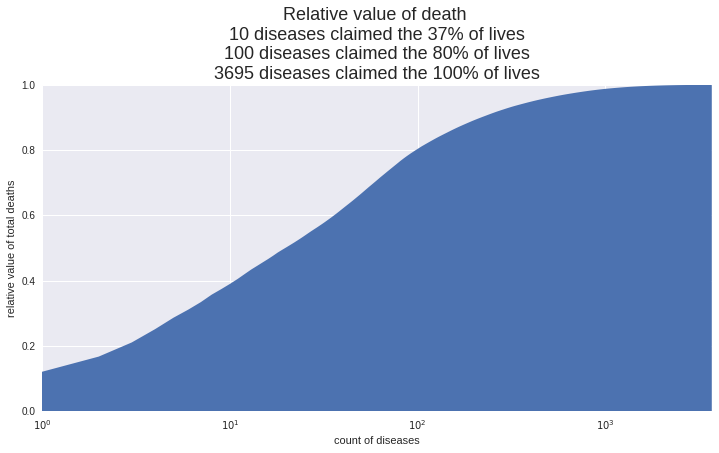

In [7]:
plt.figure(figsize=figsize)
title = 'Relative value of death '
for n in [9, 99, len(dfRank.AccumRelValue)-1]:
    title += "\n{} diseases claimed the {:.0f}% of lives".format(n+1, dfRank.AccumRelValue[n]*100.)

plt.title(title, fontsize=18)
plt.fill_between(range(dfRank.AccumRelValue.count()), dfRank.AccumRelValue, [0] * dfRank.AccumRelValue.count())
plt.xlabel('count of diseases')
plt.ylabel('relative value of total deaths')
plt.xscale('log')
plt.xlim(0,len(xx))
plt.ylim(0, 1)
plt.legend()

In [8]:
# create new dataframe with part of general data
#
# leaving data when Age less than 120
# leaving data with DayOfWeekOfDeath less than 7
# leaving only 100 of the most dangerous diseases (for simplification)
df = dffull[dffull.Age < 120][dffull.DayOfWeekOfDeath < 8][dffull.Icd10Code.isin(deseasesDeathsList.iloc[0:100].index.tolist())]

/opt/conda/bin/ipython:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sys.exit(IPython.start_ipython())


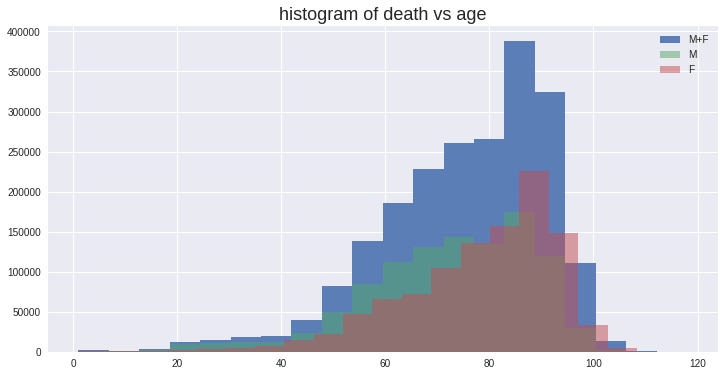

In [9]:
plt.figure(figsize=figsize)
plt.title('histogram of death vs age', fontsize=18)
_ = plt.hist(df.Age.tolist(), 20, alpha=0.9, label='M+F')
_ = plt.hist(df[df.Sex == 'M'].Age.tolist(), 20, alpha=0.5, label='M')
_ = plt.hist(df[df.Sex == 'F'].Age.tolist(), 20, alpha=0.5, label='F')
_ = plt.legend()

/opt/conda/bin/ipython:8: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


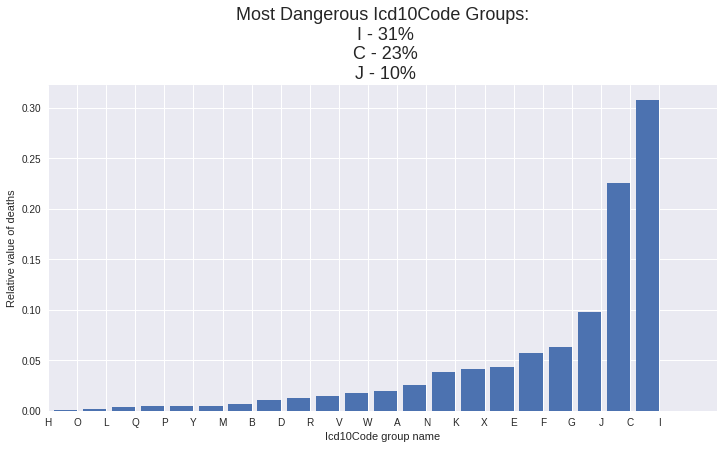

In [10]:
d = []
for group in sorted(dfRank.Icd10Code.str[0].unique()):
    part = {}
    part['Group'] = group
    part['Value'] = dfRank[dfRank.Icd10Code.str[0] == group]['Value'].sum()
    d.append(part)
    
dfIcdGroup = pd.DataFrame(d).sort_index(by=['Value'])
dfIcdGroup['RelValue'] = dfIcdGroup.Value / totalDeaths

plt.figure(figsize=figsize)
plt.bar([x - 0.4 for x in range(dfIcdGroup.Value.count())], dfIcdGroup.RelValue)
_ = plt.xticks(range(len(dfIcdGroup.Value)), dfIcdGroup.Group)
plt.xlabel('Icd10Code group name')
plt.ylabel('Relative value of deaths')
plt.xlim(0, 23)

title = 'Most Dangerous Icd10Code Groups:'
for x in ['I', 'C', 'J']:
    title += "\n {} - {:.0f}%".format(x, dfIcdGroup[dfIcdGroup.Group == x].RelValue.values[0] * 100.)
plt.title(title, fontsize=18)

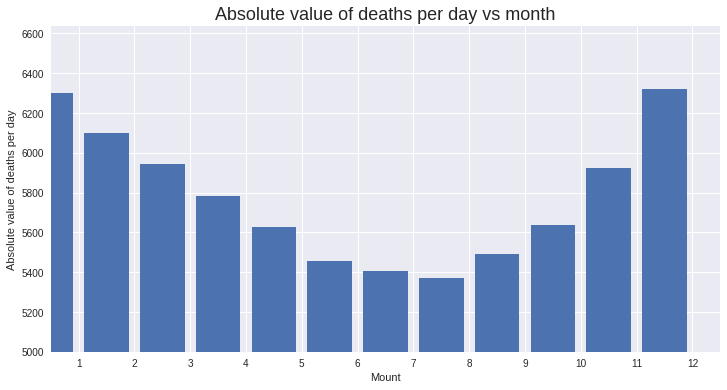

In [11]:
DaysInMonths = [calendar.monthrange(2014, x)[1] for x in range(1, 13)]

s = df.MonthOfDeath.value_counts().sort_index()
valuePerDay = s.values / DaysInMonths

plt.figure(figsize=figsize)
plt.title('Absolute value of deaths per day vs month', fontsize=18)
x = np.linspace(0.5, 11.5, 12)
plt.bar(x, valuePerDay)
plt.xticks(range(1, 13), range(1, 13))
plt.ylim(5000, )
plt.xlim(0.5, 12.5)
plt.ylabel('Absolute value of deaths per day')
plt.xlabel('Mount')

/opt/conda/bin/ipython:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


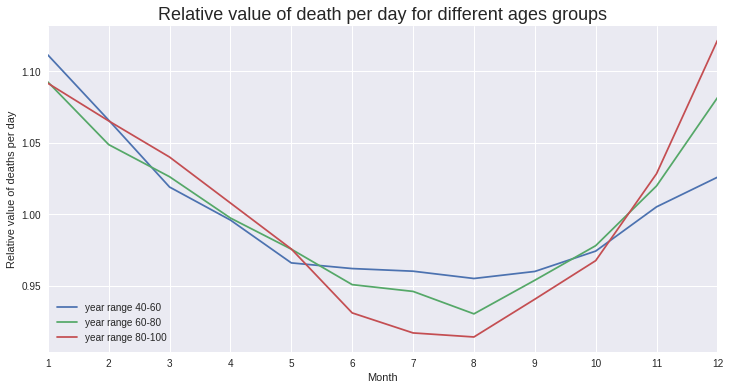

In [12]:
plt.figure(figsize=(12, 6))
for st, en in [(40, 60), (60, 80), (80, 100)]:
    s = df[df.Age < en][df.Age > st].MonthOfDeath.value_counts().sort_index()
    valuePerDay = (s.values / DaysInMonths)
    plt.plot(s.index, valuePerDay / valuePerDay.mean(), label="year range {}-{}".format(st, en))

plt.ylabel('Relative value of deaths per day')
plt.xlabel('Month')
plt.xticks(range(1, 13))
plt.xlim(1, 12)
plt.legend()
plt.title("Relative value of death per day for different ages groups", fontsize=18)